In [34]:
# Carga inicial de librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Limpieza datos incidencia acumulada

In [2]:
#Carga de ficheros de datos
datos_covid = pd.read_csv('../data/inicial/datos_covid/cv19_ia.csv', header=0)

In [3]:
#Obtenemos las dimensiones del dataframe
shape = datos_covid.shape

print("Número de atributos:", shape[1])
print("Número de filas :", shape[0])
print("Nombre de los atributos:", datos_covid.columns.values)

Número de atributos: 6
Número de filas : 3624
Nombre de los atributos: ['fecha_datos' 'isla' 'fecha' 'numero_casos' 'ia_7dias' 'ia_14dias']


Este dataset contiene 3624 registros que corresponden con los datos de casos de covid en las Islas Canarias y 6 variabless que los caracterizan.La descripción de las variables obtenidas son:

* **fecha_datos:** Fecha en que se han extraido los datos de la base de datos de Sanidad.
* **isla:** Isla a la que pertenecen los datos.
* **fecha:** Fecha de los datos.
* **numero_casos:** Número total de casos covid declarados en la isla ese día.
* **ia_7dias:** Incidencia acumulada de casos covid calculada sobre los 7 días anteriores al día actual.
* **ia_14dias:** Incidencia acumulada de casos covid calculada sobre los 14 días anteriores al día actual.

Realizamos la búsqueda de valores vacíos en el conjunto de datos:

In [4]:
def comporbar_valores_perdidos(df):
    '''Compruba si existen valores perdidos en el DataFrame
    
    Args:
    df (DataFrame): DataFrame con los datos para comprobar la existencia de datos perdidos
    '''
    #Buscamos los valores vacíos
    print("\nValores no definidos:")
    print(df.isna().sum())
    
    print("\nValores nulos:")
    print(df.isnull().sum())

In [5]:
comporbar_valores_perdidos(datos_covid)


Valores no definidos:
fecha_datos     0
isla            0
fecha           0
numero_casos    0
ia_7dias        0
ia_14dias       0
dtype: int64

Valores nulos:
fecha_datos     0
isla            0
fecha           0
numero_casos    0
ia_7dias        0
ia_14dias       0
dtype: int64


Podemos observar que el conjunto de datos no posee valores perdidos. Mostramos la información de las variables para determinar que están en el tipo de datos correcto y visualizamos una muestra de los datos:

In [6]:
# Información de las variables
datos_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3624 entries, 0 to 3623
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fecha_datos   3624 non-null   object
 1   isla          3624 non-null   object
 2   fecha         3624 non-null   object
 3   numero_casos  3624 non-null   int64 
 4   ia_7dias      3624 non-null   object
 5   ia_14dias     3624 non-null   object
dtypes: int64(1), object(5)
memory usage: 170.0+ KB


In [7]:
# Muestra del conjunto de datos.
datos_covid.head()

,fecha_datos,isla,fecha,numero_casos,ia_7dias,ia_14dias
0,29/03/2022,LANZAROTE,01/01/2021,14,"48,13493184093652","77,6576900367109"
1,29/03/2022,FUERTEVENTURA,01/01/2021,1,"25,89115691711489","49,27671800354124"
2,29/03/2022,EL HIERRO,01/01/2021,0,"80,73921234412846","107,65228312550462"
3,29/03/2022,LA GOMERA,01/01/2021,0,"46,12971676353907","156,84103699603284"
4,29/03/2022,GRAN CANARIA,01/01/2021,62,"49,09289193368719","83,57480412520557"


Vemos que las variables de fecha_datos, isla, fecha, ia_7dias, ia_14dias no están en el tipo de dato correcto por lo que realizamos la corrección. en cuanto a la fecha_datos tampoco se encuentra en el formato adecuado pero dado que es una variable que no vamos a utilizar y va a ser eliminada no realizamos la corrección del tipo de dato.

In [8]:
# Eliminamos la variable fecha_datos
datos_covid = datos_covid.drop(columns=['fecha_datos'])

# Convertimos las variables con tipos de datos incorrectos en los tipos de datos que le corresponden
datos_covid['fecha'] = pd.to_datetime(datos_covid['fecha'], dayfirst=True)
datos_covid['isla'] = datos_covid['isla'].astype(str)
datos_covid['ia_7dias'] = datos_covid['ia_7dias'].str.replace(',','.').astype(float)
datos_covid['ia_14dias'] = datos_covid['ia_14dias'].str.replace(',','.').astype(float)

In [9]:
# Información de las variables
datos_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3624 entries, 0 to 3623
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   isla          3624 non-null   object        
 1   fecha         3624 non-null   datetime64[ns]
 2   numero_casos  3624 non-null   int64         
 3   ia_7dias      3624 non-null   float64       
 4   ia_14dias     3624 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 141.7+ KB


In [10]:
# Muestra del conjunto de datos.
datos_covid.head()

,isla,fecha,numero_casos,ia_7dias,ia_14dias
0,LANZAROTE,2021-01-01,14,48.134932,77.657690
1,FUERTEVENTURA,2021-01-01,1,25.891157,49.276718
2,EL HIERRO,2021-01-01,0,80.739212,107.652283
3,LA GOMERA,2021-01-01,0,46.129717,156.841037
4,GRAN CANARIA,2021-01-01,62,49.092892,83.574804


In [11]:
# Obtenemos el listado de islas del conjunto de datos
valores_islas = datos_covid['isla'].unique()
print("Valores de islas:", valores_islas)

Valores de islas: ['LANZAROTE' 'FUERTEVENTURA' 'EL HIERRO' 'LA GOMERA' 'GRAN CANARIA'
 'LA PALMA' 'TENERIFE' 'CANARIAS']


Podemos observar que aparte de los datos por isla, también existen los datos para toda la comunidad autónoma de Canarias por lo que eliminamos los datos de esta para poder hacer nuestro estudio en función de cada una de las islas.

In [12]:
# Eliminamos los datos de la CCAA de Canarias
datos_covid = datos_covid[datos_covid['isla'] != 'CANARIAS']
# Lo eliminamos también del listado de islas
valores_islas = valores_islas[:-1]

In [13]:
# Fecha inicial desde la que se tienen los datos de casos de COVID
fecha_inicio = datos_covid['fecha'].min()
# Fecha final hasta la que se tienen los datos de casos de COVID
fecha_fin = datos_covid['fecha'].max()
# Rango de fechas de la que tenemos datos de casos de COVID
rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='D')

In [14]:

def comprobar_fechas_isla(df):
    '''Compruba si existe alguna fecha para lo que no se tenga datos de una isla
    
    Args:
    df (DataFrame): DataFrame con los datos de la serie temporal de los casos de COVID para una isla
    
    Returns:
    fechas_faltantes (list): Listado con las fechas para las que no se tiene datos
    '''
    fechas_faltantes = rango_fechas[~rango_fechas.isin(df['fecha'])]
    if len(fechas_faltantes) == 0:
        return []
    else:
        return fechas_faltantes.tolist()
        # Convertir las fechas a strings
        #fechas_str = [str(fecha) for fecha in fechas_faltantes]
        #fechas_str = ','.join(fechas_str)
        
        #return fechas_str


def comprobar_fechas(df):
    '''Realiza la comprobación para cada una de las islas del DataFrame si existe alguna fecha sin datos
    
    Args:
        df (DataFrame): DataFrame con los datos de la serie temporal de los casos de COVID de todas las islas
    '''
    for isla in valores_islas:
        print('Fechas faltantes para ' + isla + ': ' + str(comprobar_fechas_isla(df[df['isla'] == isla])))

In [16]:
#Comprobamos si existe alguna fecha de la serie temporal e isla para la que no se tenga datos
comprobar_fechas(datos_covid)

Fechas faltantes para LANZAROTE: []
Fechas faltantes para FUERTEVENTURA: []
Fechas faltantes para EL HIERRO: []
Fechas faltantes para LA GOMERA: []
Fechas faltantes para GRAN CANARIA: []
Fechas faltantes para LA PALMA: []
Fechas faltantes para TENERIFE: []


Podemos observar que no hay fechas para las que no existan datos del número de casos en el periodo comprendido entre 01/01/2021 y 29/03/2022

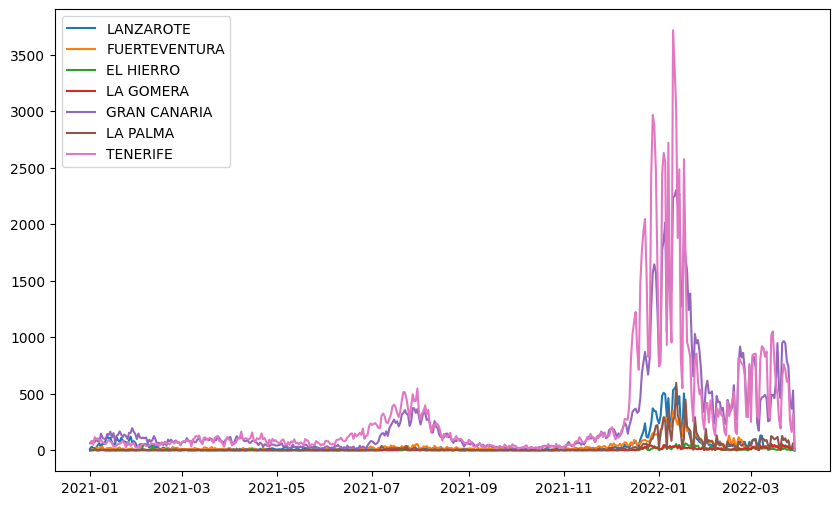

In [17]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Iterar sobre las columnas de datos y trazar cada serie temporal
for isla in valores_islas:
    datos_isla = datos_covid[datos_covid['isla'] == isla] 
    plt.plot(datos_isla['fecha'], datos_isla['numero_casos'], label=isla)


plt.legend()
plt.show()

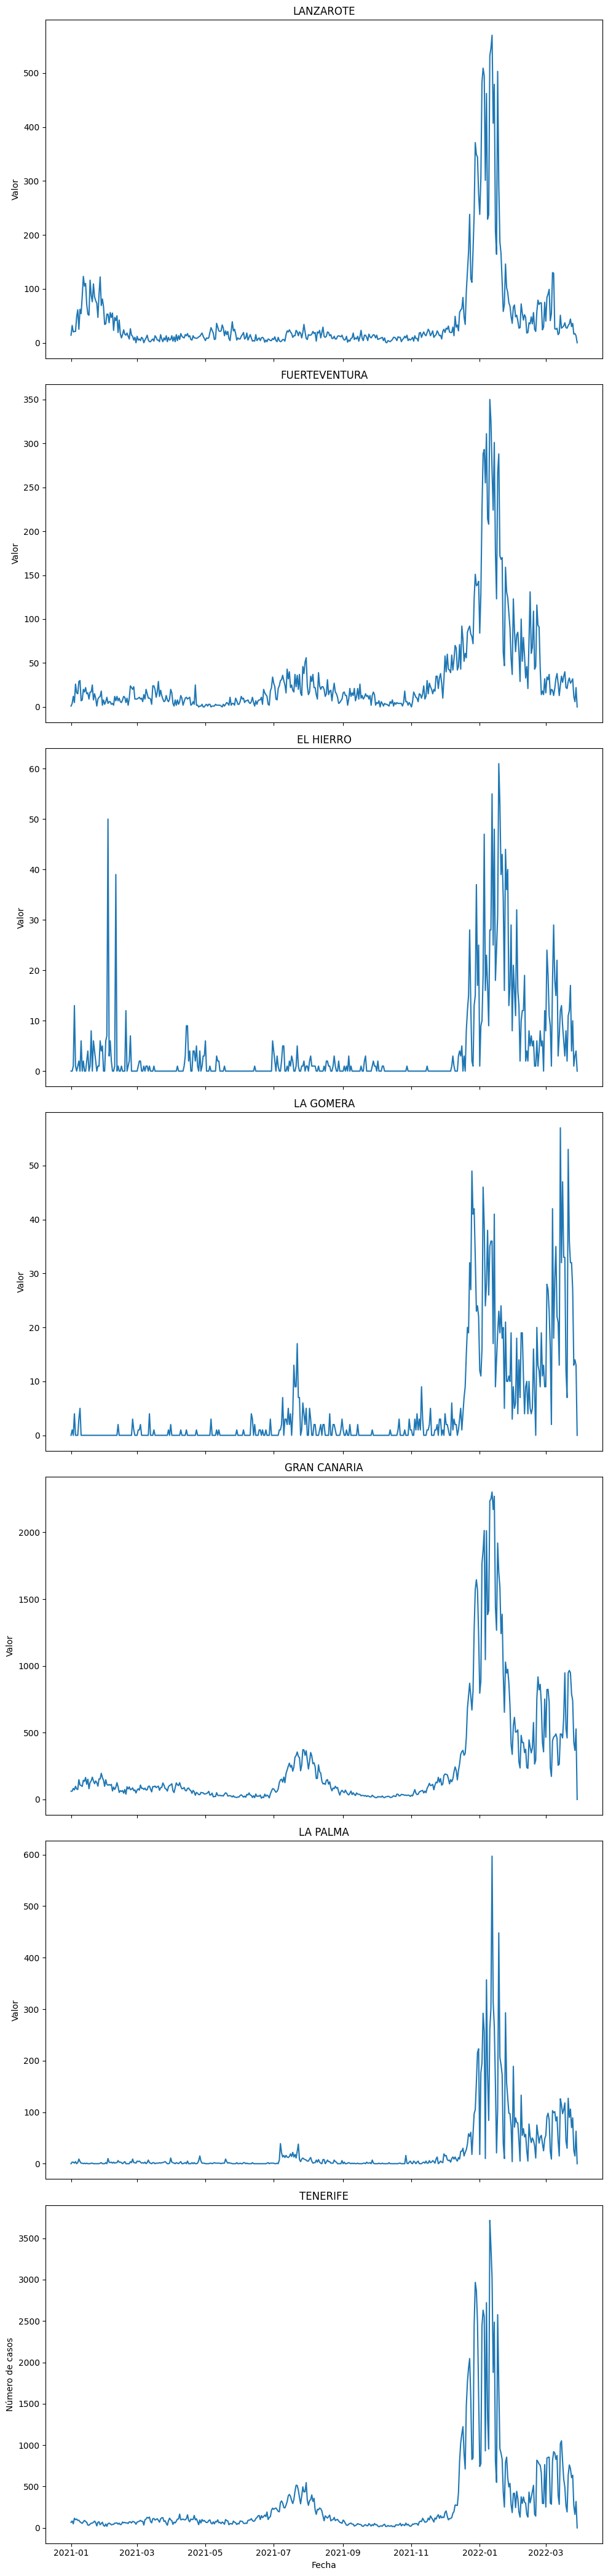

In [18]:

# Configurar el tamaño de la figura y el número de subgráficos
num_subplots = len(valores_islas)
fig, axes = plt.subplots(num_subplots, 1, figsize=(10, 6*num_subplots), sharex=True)

# Iterar sobre las islas y trazar la serie temporal correspondiente para cada una en un subgráfico diferente
for i, isla in enumerate(valores_islas):
    datos_isla = datos_covid[datos_covid['isla'] == isla] 
    axes[i].plot(datos_isla['fecha'], datos_isla['numero_casos'])  # Trazar la serie temporal para la isla actual en el subgráfico correspondiente
    axes[i].set_title(isla)  # Establecer el título del subgráfico como el nombre de la isla
    axes[i].set_ylabel('Valor')  # Establecer la etiqueta del eje y

# Añadir etiqueta del eje x al último subgráfico
axes[-1].set_xlabel('Fecha')
axes[-1].set_ylabel('Número de casos')

# Ajustar el diseño de los subgráficos para evitar superposiciones
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# Limpieza datos PCRs

In [19]:
#Carga de ficheros de datos
datos_pcrs = pd.read_csv('../data/inicial/datos_covid/cv19_pcr_porcentaje.csv', header=0)

In [20]:
#Obtenemos las dimensiones del dataframe
shape = datos_pcrs.shape

print("Número de atributos:", shape[1])
print("Número de filas :", shape[0])
print("Nombre de los atributos:", datos_pcrs.columns.values)

Número de atributos: 7
Número de filas : 3616
Nombre de los atributos: ['fecha_datos' 'isla' 'fecha' 'pcr_total' 'pcr_positivos'
 'pcr_porcentaje_positivos' 'pcr_porcentaje_positivos_7dias']


Este dataset contiene 3616 registros que corresponden con los datos de resultados de test PCR realizados en las Islas Canarias por isla y 7 variables que los caracterizan.

La descripción de las variables obtenidas son:

* **fecha_datos:** Fecha en que se han extraido los datos de la base de datos de Sanidad.
* **isla:** Isla a la que pertenecen los datos.
* **fecha:** Fecha de los datos.
* **pcr_total:** Número total de test pcr realizados en esa isla ese día.
* **pcr_positivos:** Número total de test pcr realizados en esa isla ese día que dieron positivo.
* **pcr_porcentaje_positivos:** Porcentaje de test pcr realizados en esa isla ese día que dieron positivo.
* **pcr_porcentaje_positivos_7dias:** Porcentaje de test pcr realizados en esa isla ese día que dieron positivo acumulado en los 7 días anteriores a la fecha actual.

Realizamos la búsqueda de valores vacíos en el conjunto de datos:

In [21]:
comporbar_valores_perdidos(datos_pcrs)


Valores no definidos:
fecha_datos                       0
isla                              0
fecha                             0
pcr_total                         0
pcr_positivos                     0
pcr_porcentaje_positivos          0
pcr_porcentaje_positivos_7dias    0
dtype: int64

Valores nulos:
fecha_datos                       0
isla                              0
fecha                             0
pcr_total                         0
pcr_positivos                     0
pcr_porcentaje_positivos          0
pcr_porcentaje_positivos_7dias    0
dtype: int64


Podemos observar que el conjunto de datos no posee valores perdidos. Mostramos la información de las variables para determinar que están en el tipo de datos correcto y visualizamos una muestra de los datos:

In [22]:
# Información de las variables
datos_pcrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   fecha_datos                     3616 non-null   object
 1   isla                            3616 non-null   object
 2   fecha                           3616 non-null   object
 3   pcr_total                       3616 non-null   int64 
 4   pcr_positivos                   3616 non-null   int64 
 5   pcr_porcentaje_positivos        3616 non-null   object
 6   pcr_porcentaje_positivos_7dias  3616 non-null   object
dtypes: int64(2), object(5)
memory usage: 197.9+ KB


In [23]:
# Muestra del conjunto de datos.
datos_pcrs.head()

,fecha_datos,isla,fecha,pcr_total,pcr_positivos,pcr_porcentaje_positivos,pcr_porcentaje_positivos_7dias
0,29/03/2022,EL HIERRO,01/01/2021,1,0,0,"4,529616724738676"
1,29/03/2022,EL HIERRO,02/01/2021,39,0,0,"4,529616724738676"
2,29/03/2022,EL HIERRO,03/01/2021,8,1,"12,5","3,833865814696486"
3,29/03/2022,EL HIERRO,04/01/2021,39,16,"41,02564102564103","4,088050314465409"
4,29/03/2022,EL HIERRO,05/01/2021,20,5,25,8


Vemos que las variables de fecha_datos, isla, fecha, pcr_porcentaje_positivos y pcr_porcentaje_positivos_7dias no están en el tipo de dato correcto por lo que realizamos la corrección. En cuanto a la fecha_datos tampoco se encuentra en el formato adecuado pero dado que es una variable que no vamos a utilizar y va a ser eliminada por lo que no realizamos la corrección del tipo de dato.

In [24]:
# Eliminamos la variable fecha_datos
datos_pcrs = datos_pcrs.drop(columns=['fecha_datos'])

# Convertimos las variables con tipos de datos incorrectos en los tipos de datos que le corresponden
datos_pcrs['fecha'] = pd.to_datetime(datos_pcrs['fecha'], dayfirst=True)
datos_pcrs['isla'] = datos_pcrs['isla'].astype(str)
datos_pcrs['pcr_porcentaje_positivos'] = datos_pcrs['pcr_porcentaje_positivos'].str.replace(',','.').astype(float)
datos_pcrs['pcr_porcentaje_positivos_7dias'] = datos_pcrs['pcr_porcentaje_positivos_7dias'].str.replace(',','.').astype(float)

In [25]:
# Información de las variables
datos_pcrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   isla                            3616 non-null   object        
 1   fecha                           3616 non-null   datetime64[ns]
 2   pcr_total                       3616 non-null   int64         
 3   pcr_positivos                   3616 non-null   int64         
 4   pcr_porcentaje_positivos        3616 non-null   float64       
 5   pcr_porcentaje_positivos_7dias  3616 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 169.6+ KB


In [26]:
# Muestra del conjunto de datos.
datos_pcrs.head()

,isla,fecha,pcr_total,pcr_positivos,pcr_porcentaje_positivos,pcr_porcentaje_positivos_7dias
0,EL HIERRO,2021-01-01,1,0,0.000000,4.529617
1,EL HIERRO,2021-01-02,39,0,0.000000,4.529617
2,EL HIERRO,2021-01-03,8,1,12.500000,3.833866
3,EL HIERRO,2021-01-04,39,16,41.025641,4.088050
4,EL HIERRO,2021-01-05,20,5,25.000000,8.000000


In [27]:
# Obtenemos el listado de islas del conjunto de datos
valores_islas_pcr = datos_pcrs['isla'].unique()
print("Valores de islas:", valores_islas_pcr)

Valores de islas: ['EL HIERRO' 'LA PALMA' 'LA GOMERA' 'TENERIFE' 'GRAN CANARIA'
 'FUERTEVENTURA' 'LANZAROTE' 'CANARIAS']


Podemos observar que nuevamente nos encontramos con que tenemos datos globales de la comunidad autónoma de Canarias por lo que los eliminameros para la realización de nuestro estudio.

In [28]:
# Eliminamos los datos de la CCAA de Canarias
datos_pcrs = datos_pcrs[datos_pcrs['isla'] != 'CANARIAS']
# Lo eliminamos también del listado de islas
valores_islas_pcr = valores_islas_pcr[:-1]

In [29]:
comprobar_fechas(datos_pcrs)

Fechas faltantes para LANZAROTE: [Timestamp('2022-03-29 00:00:00')]
Fechas faltantes para FUERTEVENTURA: [Timestamp('2022-03-29 00:00:00')]
Fechas faltantes para EL HIERRO: [Timestamp('2022-03-29 00:00:00')]
Fechas faltantes para LA GOMERA: [Timestamp('2022-03-29 00:00:00')]
Fechas faltantes para GRAN CANARIA: [Timestamp('2022-03-29 00:00:00')]
Fechas faltantes para LA PALMA: [Timestamp('2022-03-29 00:00:00')]
Fechas faltantes para TENERIFE: [Timestamp('2022-03-29 00:00:00')]


Podemos ver que para la serie temporal de los datos de resultados de PCRs no tenemos los datos de la fecha 29/03/2022 correspondiente con la última fecha de datos de casos de COVID por lo que acotaremos los datos quedandonos con el rango de fechas del 01/01/2021 hasta el 28/03/2022.

Una vez tenemos los datos en formato correcto vamos a fusionar los datos de los casos de COVID con el de resultados PCRs de forma que tengamos todos los datos en un solo DataFrame. Para realizar la fusión utilizaremos como claves las variables fecha e isla. Antes de realizar la fusión debemos modificar el tipo de dato de las fechas ya que no podemos realizar una fusión con este tipo de dato, por lo que convertimos la variable DateTime a String para poder realizar la fusión. Una vez realicemos la fusión devolveremos el tipo de dato correcto a la variable.

In [30]:
# Para poder hacer la fusión debemos de pasar los datos a tipo string ya que es una de las claves de la fusión
datos_covid['fecha'] = datos_covid['fecha'].astype(str)
datos_pcrs['fecha'] = datos_pcrs['fecha'].astype(str)

In [31]:
# Fusionamos los datos de ambos DataFramne
df_covid_final = pd.merge(datos_covid, datos_pcrs, on=['fecha', 'isla'], how='inner')

In [32]:
# Devolvemos el tipo DateTime a la variable fecha
df_covid_final['fecha'] = pd.to_datetime(df_covid_final['fecha'])

In [33]:
# Mostramos el resultado de la fusión
df_covid_final

,isla,fecha,numero_casos,ia_7dias,ia_14dias,pcr_total,pcr_positivos,pcr_porcentaje_positivos,pcr_porcentaje_positivos_7dias
0,LANZAROTE,2021-01-01,14,48.134932,77.657690,212,16,7.547170,3.298153
1,FUERTEVENTURA,2021-01-01,1,25.891157,49.276718,31,1,3.225806,4.934823
2,EL HIERRO,2021-01-01,0,80.739212,107.652283,1,0,0.000000,4.529617
3,LA GOMERA,2021-01-01,0,46.129717,156.841037,7,1,14.285714,12.459016
4,GRAN CANARIA,2021-01-01,62,49.092892,83.574804,1017,78,7.669617,5.668176
...,...,...,...,...,...,...,...,...,...
3159,LANZAROTE,2022-03-28,13,134.777809,282.391600,266,15,5.639098,17.935192
3160,LA GOMERA,2022-03-28,13,954.885137,1974.351877,37,16,43.243243,44.134078
3161,LA PALMA,2022-03-28,63,626.662513,1386.326056,298,78,26.174497,27.955056
3162,EL HIERRO,2022-03-28,4,520.319368,995.783619,9,5,55.555556,23.465704


# Limpieza capacidad asistencial

In [ ]:
#Carga de ficheros de datos
datos_centros = pd.read_csv('../data/inicial/datos_capacidad_asistencial/csv_capacidad_asistencial_centros.csv', header=0)
datos_urgencias = pd.read_csv('../data/inicial/datos_capacidad_asistencial/csv_ingresos_urgencias_diarios.csv', header=0)

In [ ]:
datos_centros = datos_centros[['codigo_centro', 'isla']]
datos_centros = datos_centros.rename(columns={'codigo_centro': 'codigo'})

In [ ]:
datos_centros.head()

In [ ]:
datos_urgencias = pd.merge(datos_urgencias, datos_centros, on=['codigo'], how='left')

# Seleccionamos sólo las columnas que nos interesan
datos_urgencias = datos_urgencias[['fecha',  'serie', 'valor', 'isla']]

In [ ]:
# Dividimos los datos en dos dataframe distintos:
#     Uno para los datos de ingresos por otras enfermedades
#     Uno para los datos de ingresos por COVID

datos_urgencias_ingr = datos_urgencias[datos_urgencias['serie'] == 'Urg_ingr']
datos_urgencias_ingr = datos_urgencias_ingr[['fecha', 'isla', 'valor']]

datos_urgencias_cv = datos_urgencias[datos_urgencias['serie'] == 'Urg_cv']
datos_urgencias_cv = datos_urgencias_cv[['fecha', 'isla', 'valor']]

In [ ]:
datos_urgencias_ingr['fecha'] = pd.to_datetime(datos_urgencias_ingr['fecha'], dayfirst=True)
datos_urgencias_ingr['isla'] = datos_urgencias_ingr['isla'].astype(str)

datos_urgencias_cv['fecha'] = pd.to_datetime(datos_urgencias_cv['fecha'], dayfirst=True)
datos_urgencias_cv['isla'] = datos_urgencias_cv['isla'].astype(str)

In [ ]:
datos_urgencias_ingr = datos_urgencias_ingr.sort_values(by='fecha')
datos_urgencias_cv = datos_urgencias_cv.sort_values(by='fecha')

In [ ]:
rango_fechas_ingr = (datos_urgencias_ingr['fecha'] >= fecha_inicio) & (datos_urgencias_ingr['fecha'] <= fecha_fin)
datos_urgencias_ingr = datos_urgencias_ingr[rango_fechas_ingr]

rango_fechas_cv = (datos_urgencias_cv['fecha'] >= fecha_inicio) & (datos_urgencias_cv['fecha'] <= fecha_fin)
datos_urgencias_cv = datos_urgencias_cv[rango_fechas_cv]

In [ ]:
datos_urgencias_ingr = datos_urgencias_ingr.groupby(['isla', 'fecha'], as_index=False).sum()
datos_urgencias_cv = datos_urgencias_cv.groupby(['isla', 'fecha'], as_index=False).sum()

In [ ]:
comprobar_fechas(datos_urgencias_ingr)

In [ ]:
comprobar_fechas(datos_urgencias_cv)

In [ ]:
fecha_faltante = pd.to_datetime('2021-11-19')

fecha_anterior = datos_urgencias_ingr.loc[datos_urgencias_ingr['fecha'] < fecha_faltante, 'fecha'].max()
fecha_siguiente = datos_urgencias_ingr.loc[datos_urgencias_ingr['fecha'] > fecha_faltante, 'fecha'].min()

valor_anterior_ingr = datos_urgencias_ingr.loc[datos_urgencias_ingr['fecha'] == fecha_anterior, 'valor'].values[0]
valor_siguiente_ingr = datos_urgencias_ingr.loc[datos_urgencias_ingr['fecha'] == fecha_siguiente, 'valor'].values[0]
valor_medio_ingr = round(np.mean([valor_anterior_ingr, valor_siguiente_ingr]))

valor_anterior_cv = datos_urgencias_cv.loc[datos_urgencias_cv['fecha'] == fecha_anterior, 'valor'].values[0]
valor_siguiente_cv = datos_urgencias_cv.loc[datos_urgencias_cv['fecha'] == fecha_siguiente, 'valor'].values[0]
valor_medio_cv = round(np.mean([valor_anterior_cv, valor_siguiente_cv]))

In [ ]:
fila_faltante_ingr = pd.DataFrame({'fecha': [fecha_faltante], 'isla': 'EL HIERRO', 'valor': [valor_medio_ingr]})
datos_urgencias_ingr = pd.concat([datos_urgencias_ingr, fila_faltante_ingr], ignore_index=True)

fila_faltante_cv = pd.DataFrame({'fecha': [fecha_faltante], 'isla': 'EL HIERRO', 'valor': [valor_medio_cv]})
datos_urgencias_cv = pd.concat([datos_urgencias_cv, fila_faltante_cv], ignore_index=True)

In [ ]:
# Para poder hacer la fusión debemos de pasar los datos a tipo string
df_covid_final['fecha'] = df_covid_final['fecha'].astype(str)
datos_urgencias_ingr['fecha'] = datos_urgencias_ingr['fecha'].astype(str)
datos_urgencias_cv['fecha'] = datos_urgencias_cv['fecha'].astype(str)

df_covid_final = pd.merge(df_covid_final, datos_urgencias_ingr, on=['fecha', 'isla'], how='inner')

# Renombramos la nueva columna por la de ingresos en urgencias
df_covid_final = df_covid_final.rename(columns={'valor': 'Urg_ingr'})

df_covid_final = pd.merge(df_covid_final, datos_urgencias_cv, on=['fecha', 'isla'], how='inner')

# Renombramos la nueva columna por la de ingresos en urgencias por COVID
df_covid_final = df_covid_final.rename(columns={'valor': 'Urg_cv'})

df_covid_final['fecha'] = pd.to_datetime(df_covid_final['fecha'])
df_covid_final['Urg_ingr'] = df_covid_final['Urg_ingr'].astype(int)
df_covid_final['Urg_cv'] = df_covid_final['Urg_cv'].astype(int)

In [ ]:
df_covid_final

# Otros ingresos

In [ ]:
datos_ocupacion = pd.read_csv('../data/inicial/datos_capacidad_asistencial/csv_ocupacion_centros_diaria.csv', header=0)

datos_ocupacion = datos_ocupacion.rename(columns={'codigo_centro': 'codigo'})

datos_ocupacion = pd.merge(datos_ocupacion, datos_centros, on=['codigo'], how='left')

In [ ]:
datos_ocupacion = datos_ocupacion[['fecha', 'isla', 'unidad_funcional', 'cv19', 'nocv19']]

datos_ocupacion['fecha'] = pd.to_datetime(datos_ocupacion['fecha'], dayfirst=True)
#datos_ocupacion['isla'] = datos_ocupacion['isla'].astype(str)
#datos_ocupacion['unidad_funcional'] = datos_ocupacion['unidad_funcional'].astype(str)
#datos_ocupacion['cv19'] = datos_ocupacion['cv19'].astype(int)
#datos_ocupacion['nocv19'] = datos_ocupacion['nocv19'].astype(int)

In [ ]:
rango_fechas = (datos_ocupacion['fecha'] >= fecha_inicio) & (datos_ocupacion['fecha'] <= fecha_fin)
datos_ocupacion = datos_ocupacion[rango_fechas]

# Ordenamos por fecha
datos_ocupacion = datos_ocupacion.sort_values(by='fecha')

# Obtenemos los valores por fecha, isla y unidad funcional
datos_ocupacion = datos_ocupacion.groupby(['isla', 'fecha', 'unidad_funcional'], as_index=False).sum()

In [ ]:
unidades = datos_ocupacion['unidad_funcional'].unique()
unidades

In [ ]:
datos_ocupacion_hpt = datos_ocupacion[datos_ocupacion['unidad_funcional'] == 'HPT']
datos_ocupacion_hpt = datos_ocupacion_hpt[['isla', 'fecha', 'cv19', 'nocv19']]

datos_ocupacion_ccr = datos_ocupacion[datos_ocupacion['unidad_funcional'] == 'CCR']
datos_ocupacion_ccr = datos_ocupacion_ccr[['isla', 'fecha', 'cv19', 'nocv19']]

datos_ocupacion_csr = datos_ocupacion[datos_ocupacion['unidad_funcional'] == 'CSR']
datos_ocupacion_csr = datos_ocupacion_csr[['isla', 'fecha', 'cv19', 'nocv19']]

In [ ]:
datos_ocupacion_hpt.info()

In [ ]:
comprobar_fechas(datos_ocupacion_hpt)

In [ ]:
comprobar_fechas(datos_ocupacion_ccr)

In [ ]:
comprobar_fechas(datos_ocupacion_csr)